In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df_h=pd.read_csv("19-hebrews.csv")

In [2]:
df_final1=pd.read_csv("dados_processados.csv")

In [3]:
import pandas as pd

# Suponha que você tenha um DataFrame chamado df e deseja converter a coluna 'coluna_name' para strings
df_final1['text'] = df_final1['text'].astype(str)

In [4]:
df=df_final1

In [5]:
df = df.dropna()
df_final1=df_final1.dropna()

In [6]:
from gensim.models import Word2Vec
import pandas as pd



# Pré-processamento dos textos
preprocessed_texts = [text.split() for text in df_final1["text"]]
# Certifique-se de que seus textos estejam divididos em palavras (tokens)

# Treinamento do modelo Word2Vec
model_word2vec = Word2Vec(sentences=preprocessed_texts, vector_size=100, window=5, min_count=1, sg=0)
# Substitua os parâmetros acima pelos valores que você deseja para seu modelo

# Salvar o modelo treinado (opcional)
model_word2vec.save("seu_modelo_word2vec")

In [16]:
df_final1

,book,chapter,verse,text,preprocessed_text,label
0,romans,1.0,1.0,παυλος δουλος ιησου χριστου κλητος αποστολος α...,παυλος δουλος ιησου χριστου κλητος αποστολος α...,2
1,romans,1.0,2.0,ο προεπηγγειλατο δια των προφητων αυτου εν γρα...,ο προεπηγγειλατο δια των προφητων αυτου εν γρα...,2
2,romans,1.0,3.0,περι του υιου αυτου του γενομενου εκ σπερματος...,περι του υιου αυτου του γενομενου εκ σπερματος...,2
3,romans,1.0,4.0,του ορισθεντος υιου θεου εν δυναμει κατα πνευμ...,του ορισθεντος υιου θεου εν δυναμει κατα πνευμ...,2
4,romans,1.0,5.0,δι ου ελαβομεν χαριν και αποστολην εις υπακοην...,δι ου ελαβομεν χαριν και αποστολην εις υπακοην...,2
...,...,...,...,...,...,...
7649,jude,1.0,21.0,εαυτους εν αγαπη θεου τηρησατε προσδεχομενοι τ...,εαυτους εν αγαπη θεου τηρησατε προσδεχομενοι τ...,2
7650,jude,1.0,22.0,και ους μεν ελεειτε διακρινομενοι,και ους μεν ελεειτε διακρινομενοι,2
7651,jude,1.0,23.0,ους δε εν φοβω σωζετε εκ του πυρος αρπαζοντες ...,ους δε εν φοβω σωζετε εκ του πυρος αρπαζοντες ...,2
7652,jude,1.0,24.0,τω δε δυναμενω φυλαξαι απταιστους και στησαι κ...,τω δε δυναμενω φυλαξαι απταιστους και στησαι κ...,2


In [7]:
classes = df_final1['book'].unique()
print(classes)

['romans' '1-corinthians' '2-corinthians' 'galatians' 'ephesians'
 'philippians' 'colossians' '1-thessalonians' '2-thessalonians'
 '1-timothy' '2-timothy' 'titus' 'philemon' 'revelation' 'matthew' 'mark'
 'luke' 'john' 'acts-of-the-apostles' 'james' '1-peter' '2-peter' '1-john'
 '2-john' '3-john' 'jude']


In [8]:
padrao = r'mark|matthew|luke|john|acts-of-the-apostles'

# Usando str.contains com o padrão definido e atribuindo valor 1 na coluna 'label'
df_final1.loc[df_final1['book'].str.contains(padrao, case=False), 'label'] = 1

In [9]:
padrao = r'romans|1-corinthians|1-corinthians|galatians|ephesians|philippians|colossians|1-thessalonians|2-thessalonians|1-timothy|2-timothy|titus|philemon|james|1-peter|2-peter|1-john|2-john|3-john|jude'

# Usando str.contains com o padrão definido e atribuindo valor 1 na coluna 'label'
df_final1.loc[df_final1['book'].str.contains(padrao, case=False), 'label'] = 2

In [10]:
padrao = r'revelation'

# Usando str.contains com o padrão definido e atribuindo valor 1 na coluna 'label'
df_final1.loc[df_final1['book'].str.contains(padrao, case=False), 'label'] = 0

In [11]:
# Pré-processamento dos textos
preprocessed_texts = [text.split() for text in df_final1["text"]]
# Certifique-se de que seus textos estejam divididos em palavras (tokens)

# Treinamento do modelo Word2Vec
model_word2vec = Word2Vec(sentences=preprocessed_texts, vector_size=100, window=5, min_count=1, sg=0)
# Substitua os parâmetros acima pelos valores que você deseja para seu modelo

# Salvar o modelo treinado (opcional)
model_word2vec.save("seu_modelo_word2vec")

In [12]:
num_textos = len(textos)
num_labels = len(labels)

print(f"Número de textos: {num_textos}")
print(f"Número de labels: {num_labels}")

NameError: name 'textos' is not defined

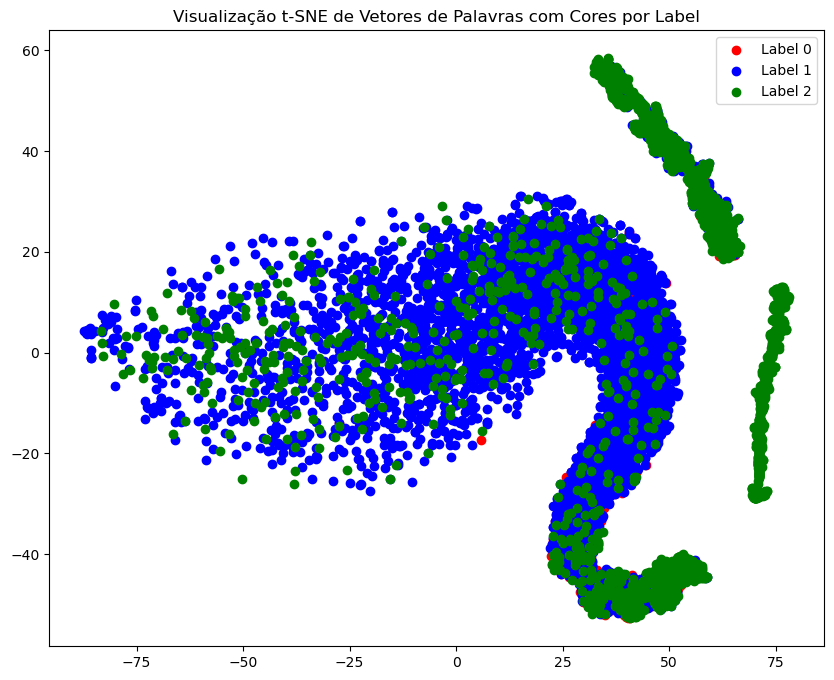

In [13]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = df_final1["text"].tolist()
labels = df_final1["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Reduza a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=2, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Crie um DataFrame com os vetores t-SNE e as palavras correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2"])
df_tsne["Palavra"] = vetores_palavras.index_to_key

# Corrija o tamanho do DataFrame para coincidir com o tamanho das listas
df_tsne = df_tsne.iloc[:len(labels)]
df_tsne["Label"] = labels  # Adicione as labels ao DataFrame

# Divida o DataFrame com base nas labels
df_label_0 = df_tsne[df_tsne["Label"] == 0]
df_label_1 = df_tsne[df_tsne["Label"] == 1]
df_label_2 = df_tsne[df_tsne["Label"] == 2]

# Plote os pontos em um gráfico 2D com cores diferentes
# Plote os pontos em um gráfico 2D com cores diferentes
plt.figure(figsize=(10, 8))
plt.scatter(df_label_0["Dimensão 1"], df_label_0["Dimensão 2"], label="Label 0", c="red")
plt.scatter(df_label_1["Dimensão 1"], df_label_1["Dimensão 2"], label="Label 1", c="blue")
plt.title("Visualização t-SNE de Vetores de Palavras com Cores por Label")

# Plot da Label 2 (verde) por cima
plt.scatter(df_label_2["Dimensão 1"], df_label_2["Dimensão 2"], label="Label 2", c="green")

plt.legend()
plt.show()


In [18]:
valores_unicos = df_final1["label"].unique()
print(valores_unicos)

[2 1 0]


c:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficiente de Silhueta: 0.879515528678894
Índice de Davies-Bouldin: 0.48229242023870683
Índice Calinski-Harabasz: 46764.51940698507


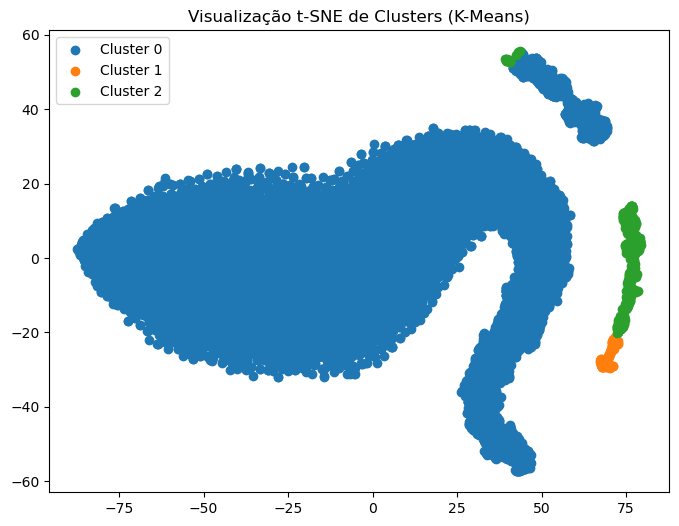

In [20]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Suponhamos que você tem um DataFrame df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = df_final1["text"].tolist()
labels = df_final1["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Aplicar K-Means aos vetores de palavras
num_clusters = 3  # Defina o número de clusters desejado
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(vetores_palavras.vectors)

# Calcular métricas de avaliação de clustering
silhouette = silhouette_score(vetores_palavras.vectors, clusters)
davies_bouldin = davies_bouldin_score(vetores_palavras.vectors, clusters)
calinski_harabasz = calinski_harabasz_score(vetores_palavras.vectors, clusters)

print(f"Coeficiente de Silhueta: {silhouette}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice Calinski-Harabasz: {calinski_harabasz}")

# Reduzir a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=2, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Criar um DataFrame com os vetores t-SNE e os clusters correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2"])
df_tsne["Cluster"] = clusters

# Plotar os pontos em um gráfico 2D com cores diferentes representando clusters
plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    df_cluster = df_tsne[df_tsne["Cluster"] == cluster_label]
    plt.scatter(df_cluster["Dimensão 1"], df_cluster["Dimensão 2"], label=f"Cluster {cluster_label}")

plt.title("Visualização t-SNE de Clusters (K-Means)")
plt.legend()
plt.show()

Coeficiente de Silhueta (DBSCAN): 0.9428776502609253
Índice de Davies-Bouldin (DBSCAN): 2.2102769155305872
Índice Calinski-Harabasz (DBSCAN): 4902.505736542461


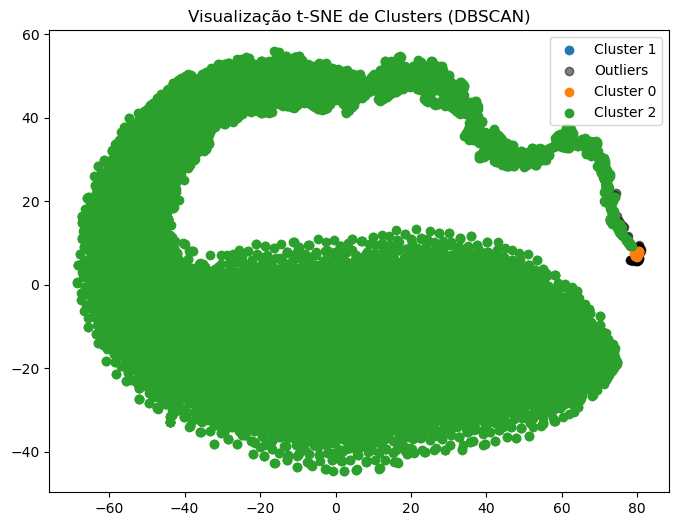

In [21]:
from sklearn.cluster import DBSCAN
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Suponhamos que você tem um DataFrame df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = df_final1["text"].tolist()
labels = df_final1["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Aplicar DBSCAN aos vetores de palavras
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuste os parâmetros eps e min_samples conforme necessário
clusters_dbscan = dbscan.fit_predict(vetores_palavras.vectors)

# Calcular métricas de avaliação de clustering para DBSCAN
silhouette_dbscan = silhouette_score(vetores_palavras.vectors, clusters_dbscan)
davies_bouldin_dbscan = davies_bouldin_score(vetores_palavras.vectors, clusters_dbscan)
calinski_harabasz_dbscan = calinski_harabasz_score(vetores_palavras.vectors, clusters_dbscan)

print(f"Coeficiente de Silhueta (DBSCAN): {silhouette_dbscan}")
print(f"Índice de Davies-Bouldin (DBSCAN): {davies_bouldin_dbscan}")
print(f"Índice Calinski-Harabasz (DBSCAN): {calinski_harabasz_dbscan}")

# Reduzir a dimensionalidade dos vetores de palavras com t-SNE para os clusters do DBSCAN
tsne_dbscan = TSNE(n_components=2, random_state=42)
vetores_tsne_dbscan = tsne_dbscan.fit_transform(vetores_palavras.vectors)

# Criar um DataFrame com os vetores t-SNE do DBSCAN
df_tsne_dbscan = pd.DataFrame(vetores_tsne_dbscan, columns=["Dimensão 1", "Dimensão 2"])
df_tsne_dbscan["Cluster"] = clusters_dbscan

# Plotar os pontos em um gráfico 2D com cores diferentes representando clusters do DBSCAN
unique_clusters_dbscan = df_tsne_dbscan["Cluster"].unique()
plt.figure(figsize=(8, 6))
for cluster_label in unique_clusters_dbscan:
    if cluster_label == -1:
        df_cluster = df_tsne_dbscan[df_tsne_dbscan["Cluster"] == cluster_label]
        plt.scatter(df_cluster["Dimensão 1"], df_cluster["Dimensão 2"], label=f"Outliers", c="black", alpha=0.5)
    else:
        df_cluster = df_tsne_dbscan[df_tsne_dbscan["Cluster"] == cluster_label]
        plt.scatter(df_cluster["Dimensão 1"], df_cluster["Dimensão 2"], label=f"Cluster {cluster_label}")

plt.title("Visualização t-SNE de Clusters (DBSCAN)")
plt.legend()
plt.show()

In [23]:
result=df_final1

Coeficiente de Silhueta: 0.9019961953163147
Índice de Davies-Bouldin: 0.4737921104085012
Índice Calinski-Harabasz: 38299.63034190848


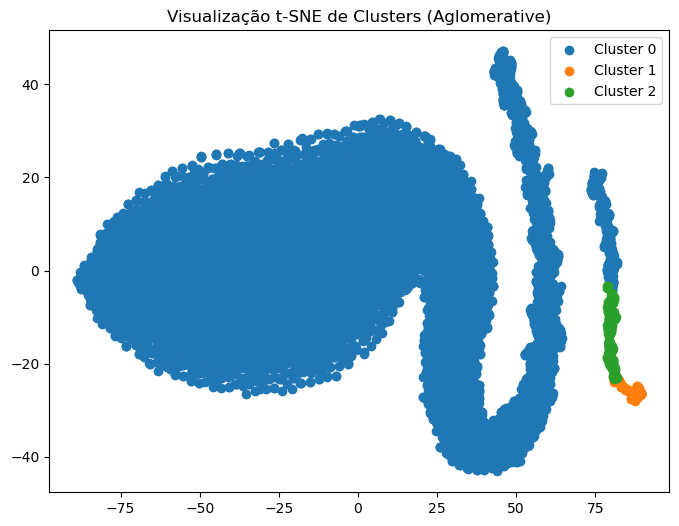

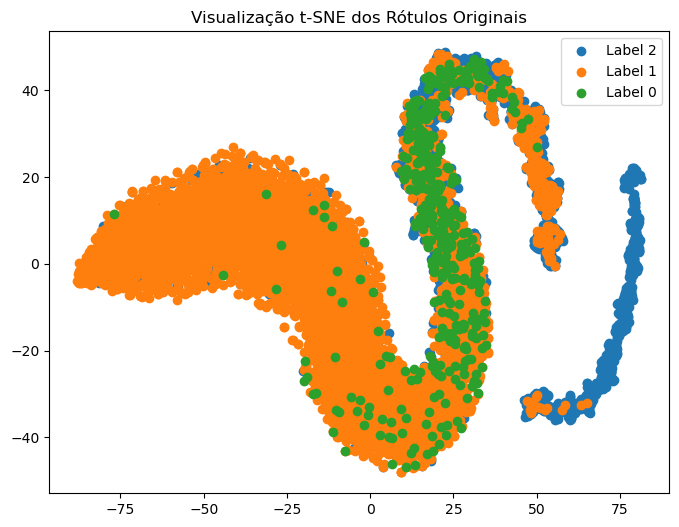

In [24]:
from sklearn.cluster import AgglomerativeClustering

# Suponhamos que você tem um DataFrame df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = result["text"].tolist()
labels = result["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Aplicar Agglomerative Clustering aos vetores de palavras
num_clusters = 3  # Defina o número de clusters desejado
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
clusters = agglomerative.fit_predict(vetores_palavras.vectors)

# Calcular métricas de avaliação de clustering
silhouette = silhouette_score(vetores_palavras.vectors, clusters)
davies_bouldin = davies_bouldin_score(vetores_palavras.vectors, clusters)
calinski_harabasz = calinski_harabasz_score(vetores_palavras.vectors, clusters)

print(f"Coeficiente de Silhueta: {silhouette}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice Calinski-Harabasz: {calinski_harabasz}")

# Reduzir a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=2, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Criar um DataFrame com os vetores t-SNE e os clusters correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2"])
df_tsne["Cluster"] = clusters

# Plotar os pontos em um gráfico 2D com cores diferentes representando clusters
plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    df_cluster = df_tsne[df_tsne["Cluster"] == cluster_label]
    plt.scatter(df_cluster["Dimensão 1"], df_cluster["Dimensão 2"], label=f"Cluster {cluster_label}")

plt.title("Visualização t-SNE de Clusters (Aglomerative)")
plt.legend()
plt.show()

# Reduzir a dimensionalidade dos vetores de palavras (rótulos) com t-SNE
tsne_labels = TSNE(n_components=2, random_state=42)
vetores_tsne_labels = tsne_labels.fit_transform(vetores_palavras.vectors[:len(labels)])  # Use apenas a quantidade correspondente aos rótulos

# Criar um DataFrame com os vetores t-SNE dos rótulos
df_tsne_labels = pd.DataFrame(vetores_tsne_labels, columns=["Dimensão 1", "Dimensão 2"])
df_tsne_labels["Label"] = labels

# Plotar os pontos de rótulos em um gráfico 2D com t-SNE
unique_labels = df_tsne_labels["Label"].unique()
plt.figure(figsize=(8, 6))
for label in unique_labels:
    df_label = df_tsne_labels[df_tsne_labels["Label"] == label]
    plt.scatter(df_label["Dimensão 1"], df_label["Dimensão 2"], label=f"Label {label}")

plt.title("Visualização t-SNE dos Rótulos Originais")
plt.legend()
plt.show()

In [13]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Suponha que você tenha um DataFrame chamado df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = result["text"].tolist()
labels = result["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Reduza a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=3, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Crie um DataFrame com os vetores t-SNE e as palavras correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2","Dimensão 3"])
df_tsne["Palavra"] = vetores_palavras.index_to_key

# Corrija o tamanho do DataFrame para coincidir com o tamanho das listas
df_tsne = df_tsne.iloc[:len(labels)]
df_tsne["Label"] = labels  # Adicione as labels ao DataFrame

# Divida o DataFrame com base nas labels
df_label_0 = df_tsne[df_tsne["Label"] == 0]
df_label_1 = df_tsne[df_tsne["Label"] == 1]
df_label_2 = df_tsne[df_tsne["Label"] == 2]

# Plote os pontos em um gráfico 2D com cores diferentes
# Plote os pontos em um gráfico 2D com cores diferentes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plote os pontos em um gráfico 3D com cores diferentes
ax.scatter(df_label_0["Dimensão 1"], df_label_0["Dimensão 2"], df_label_0["Dimensão 3"], label="Label 0", c="red")
ax.scatter(df_label_1["Dimensão 1"], df_label_1["Dimensão 2"], df_label_1["Dimensão 3"], label="Label 1", c="blue")
ax.scatter(df_label_2["Dimensão 1"], df_label_2["Dimensão 2"], df_label_2["Dimensão 3"], label="Label 2", c="green")

plt.title("Visualização t-SNE de Vetores de Palavras em 3 Dimensões com Cores por Label")
plt.legend()
plt.show()

KeyboardInterrupt: 

In [72]:
df2=pd.read_csv("23-john-1.csv")

In [15]:
import pandas as pd
import plotly.express as px

# Suponha que você tenha um DataFrame chamado df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = result["text"].tolist()
labels = result["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Reduza a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=3, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Crie um DataFrame com os vetores t-SNE e as palavras correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2", "Dimensão 3"])
df_tsne["Palavra"] = vetores_palavras.index_to_key

# Corrija o tamanho do DataFrame para coincidir com o tamanho das listas
df_tsne = df_tsne.iloc[:len(labels)]
df_tsne["Label"] = labels  # Adicione as labels ao DataFrame

# Crie um gráfico 3D interativo com Plotly
fig = px.scatter_3d(df_tsne, x="Dimensão 1", y="Dimensão 2", z="Dimensão 3", color="Label", title="Visualização t-SNE de Vetores de Palavras em 3 Dimensões com Cores por Label")
fig.show()